In [3]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [4]:
DATA_PATH = os.path.join(".", "data")

def load_data(filename, data_path=DATA_PATH):
    file_path = os.path.join(data_path, filename)
    return pd.read_csv(file_path)

jet_df = load_data("jet_experiments.csv")
case_df = load_data("jet_cases.csv")
jet_df = pd.merge(jet_df, case_df, on=['Case'])
jet_df.head()

,Case,NBP,Vfr,V_j,U_w,U_w/V_j,Re_j,Re_w,Re_j/sqrt(Re_w),1/sqrt(Re_w),Lh/d,Lw/d,H/d,Lw/Lh,d,KineVisco
0,GW65N25,30.02,3.700944,14.777026,18.85,1.275599,702.1,895.6,23.46069,0.033,2.387,7.779,0.07925,3.259,0.000565,0.000012
1,GW65N25,29.96,3.696393,14.758855,21.99,1.490031,701.2,1044.9,21.69367,0.031,2.228,6.910,0.07637,3.102,0.000565,0.000012
2,GW65N25,29.84,3.687284,14.722487,25.13,1.707099,699.5,1194.1,20.24256,0.029,2.108,6.662,0.06914,3.161,0.000565,0.000012
3,GW65N25,29.63,3.671324,14.658762,28.27,1.928835,696.5,1343.4,19.00226,0.027,1.900,6.183,0.06594,3.254,0.000565,0.000012
4,GW65N25,29.56,3.665998,14.637497,31.42,2.146264,695.5,1492.7,18.00098,0.026,1.791,5.516,0.06642,3.080,0.000565,0.000012


In [5]:
def reg_plot(x_name, y_name, main_title, fltr='Case', df=jet_df):
    X = np.array((df[x_name]))
    Y = np.array((df[y_name]))
    b, a, r_value, p_value, std_err = linregress(X, Y) 
    eqn = f'y={a:.2f}+({b:.2f}x), $R^2=${r_value**2:.2f}'
    
    return (ggplot(df)
     + aes(x=x_name, y=y_name, color=fltr)
     + geom_point(aes(shape='Case'))
     + stat_smooth(color=None, method='lm')
     + labs(title=main_title + '\n\n' + eqn)
    )

def plot_Lh(df_name):
    df_name['My_Lh_Scaling'] = (df_name['Re_j'])**(1/3)/(df_name['U_w/V_j'])**(0.42)
    return reg_plot('My_Lh_Scaling', 'Lh/d', 'My Lh Scaling: $(Re_j)^{1/3}*(V_j/U_w)^{0.42}$', df=df_name)

def plot_Lw(df_name):
    df_name['My_Lw_Scaling'] = (df_name['Re_j'])**(1/3)/(df_name['U_w/V_j'])**(0.5)
    return reg_plot('My_Lw_Scaling', 'Lw/d', 'My Lw Scaling: $(Re_j)^{1/3}*(V_j/U_w)^{0.5}$', df=df_name)

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


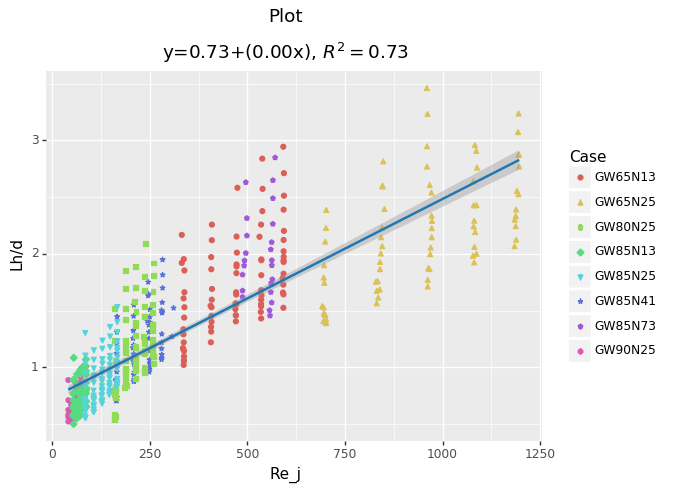

<ggplot: (-9223372036554962677)>

In [6]:
reg_plot('Re_j', 'Lh/d', "Plot")

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


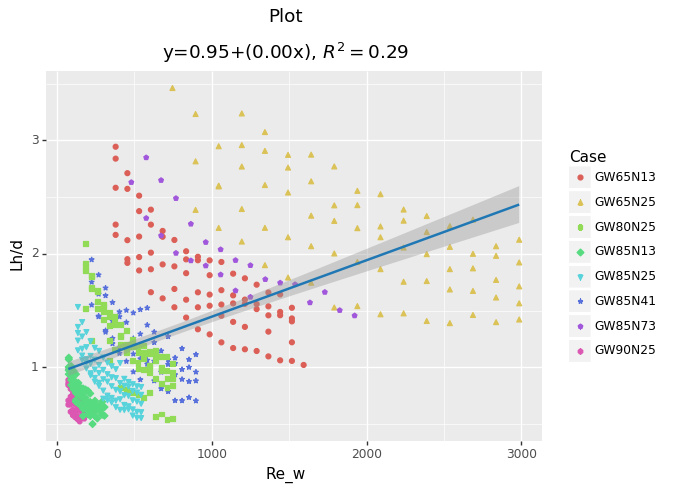

<ggplot: (-9223372036551710113)>

In [28]:
reg_plot('Re_w', 'Lh/d', "Plot")

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


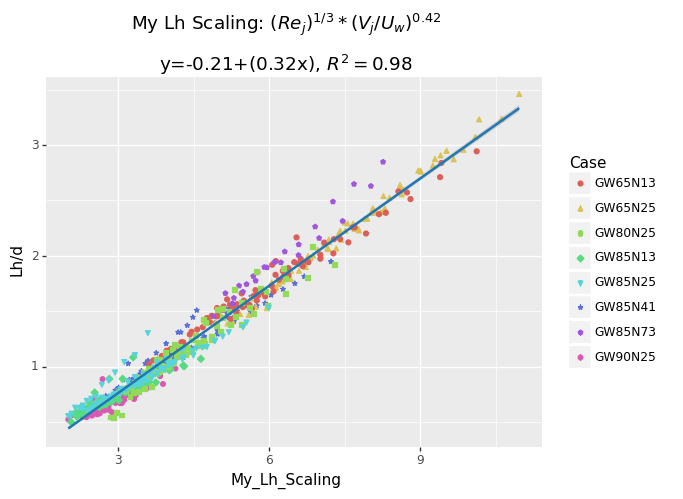

<ggplot: (-9223372036551411694)>

In [62]:
plot_Lh(jet_df)

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


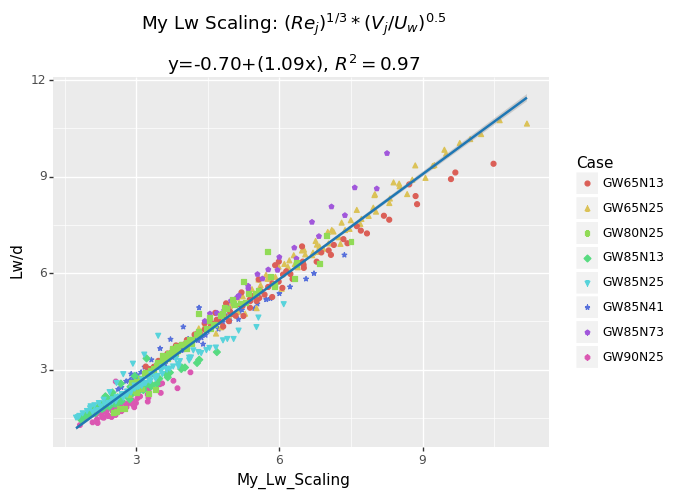

<ggplot: (-9223372036551797146)>

In [63]:
plot_Lw(jet_df)

The "GW85N41" (dark blue stars) and the "GW80N25" (green squares) have similar range of Re_j and Re_w, so select these two groups to compare further.
# "GW85N41" and  "GW80N25" 

In [48]:
GW85N41 = jet_df[jet_df.Case=="GW85N41"].copy()
GW80N25 = jet_df[jet_df.Case=="GW80N25"].copy()
combination1 = pd.concat([GW85N41, GW80N25])

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


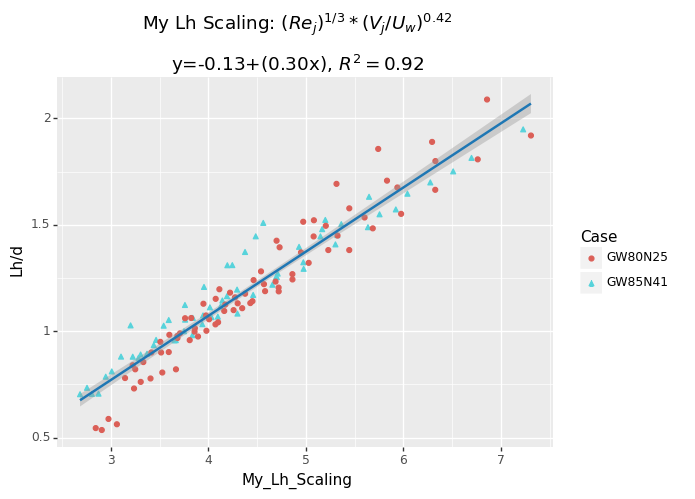

<ggplot: (-9223372036551838460)>

In [47]:
plot_Lh(combination1)

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


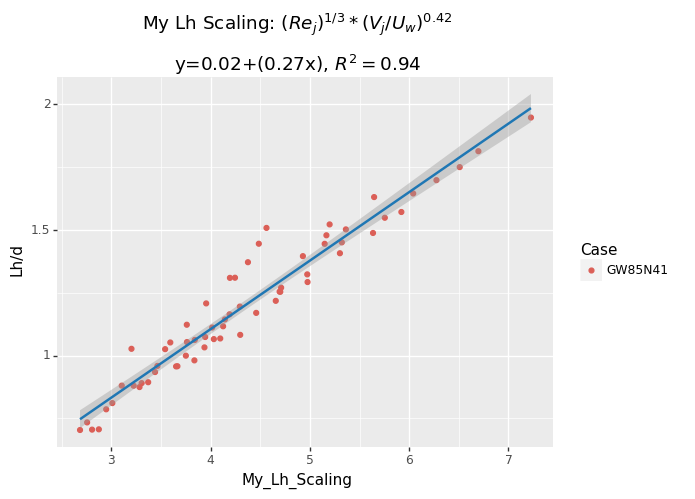

<ggplot: (302940273)>

In [49]:
plot_Lh(GW85N41)

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


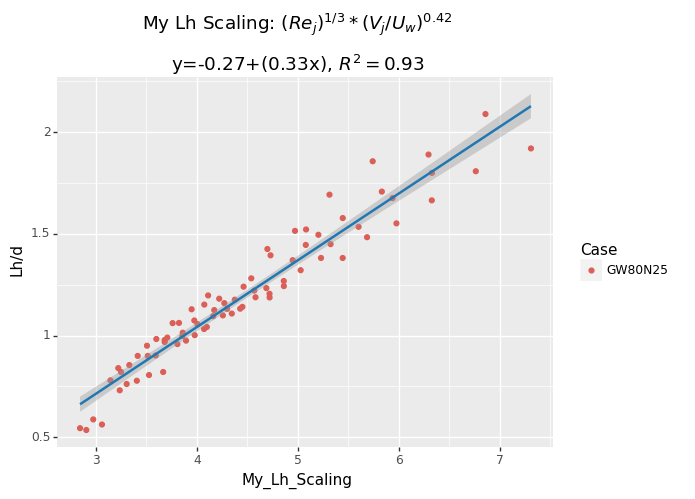

<ggplot: (-9223372036552142823)>

In [50]:
plot_Lh(GW80N25)

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


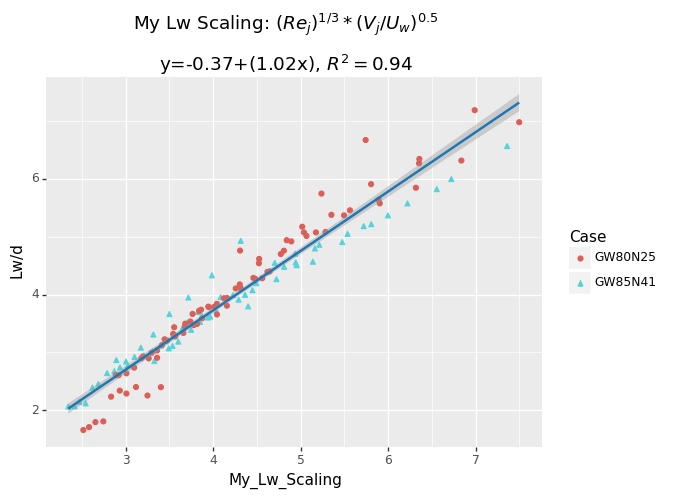

<ggplot: (299880063)>

In [52]:
plot_Lw(combination1)

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


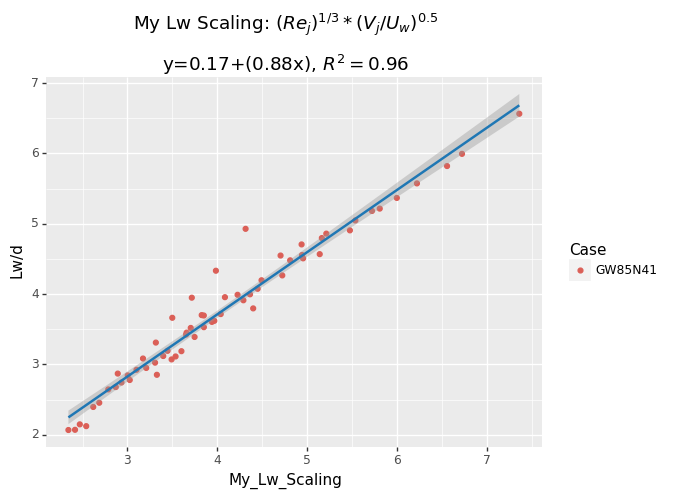

<ggplot: (-9223372036554890026)>

In [53]:
plot_Lw(GW85N41)

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


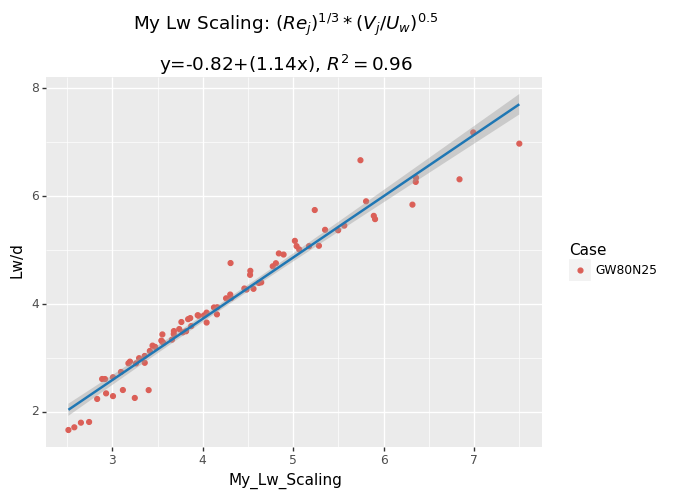

<ggplot: (302327002)>

In [54]:
plot_Lw(GW80N25)

The "GW65N13" (red circles) and the "GW85N73" (purple stars) also have similar range of Re_j and Re_w, so select these two groups to compare further.
# "GW65N13" and  "GW85N73" 

In [55]:
GW65N13 = jet_df[jet_df.Case=="GW65N13"].copy()
GW85N73 = jet_df[jet_df.Case=="GW85N73"].copy()
combination2 = pd.concat([GW65N13, GW85N73])

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


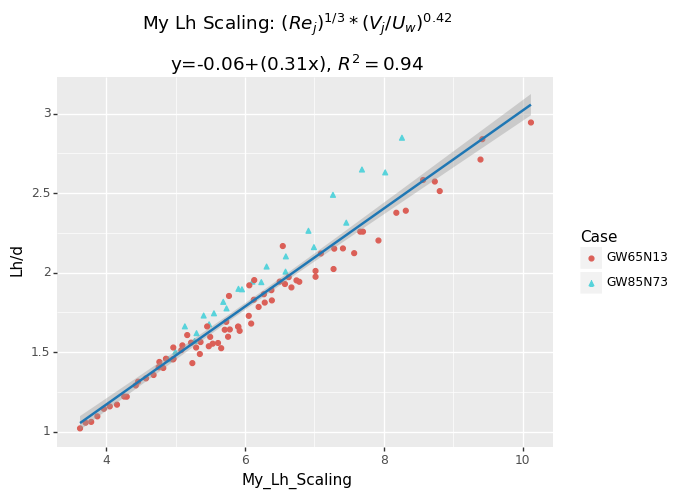

<ggplot: (303420508)>

In [56]:
plot_Lh(combination2)

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


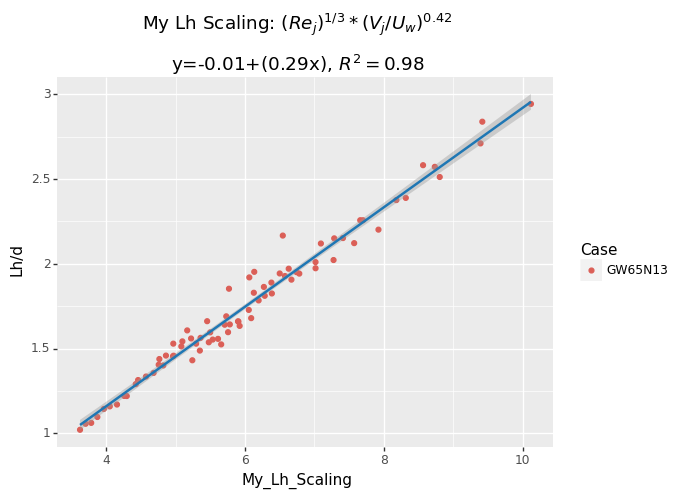

<ggplot: (303390889)>

In [57]:
plot_Lh(GW65N13)

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


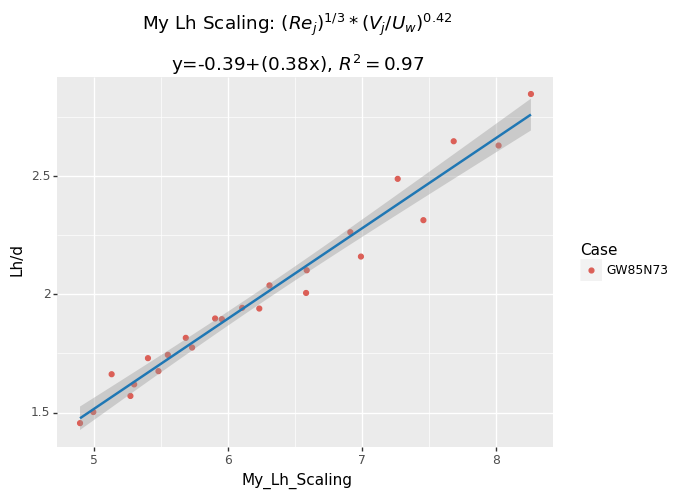

<ggplot: (303244429)>

In [58]:
plot_Lh(GW85N73)

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


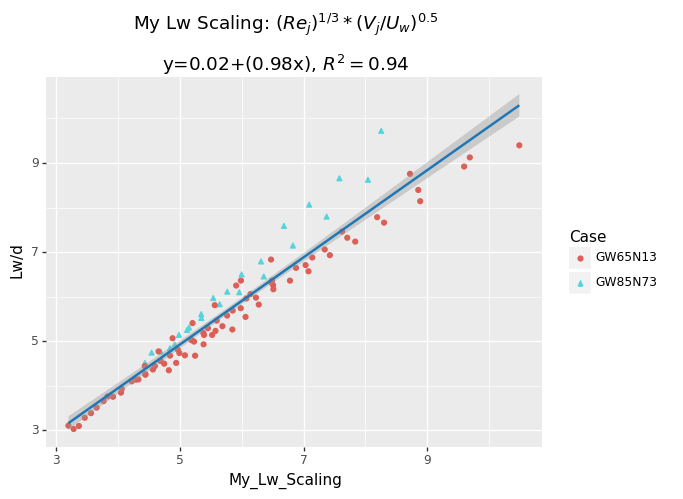

<ggplot: (302968759)>

In [59]:
plot_Lw(combination2)

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


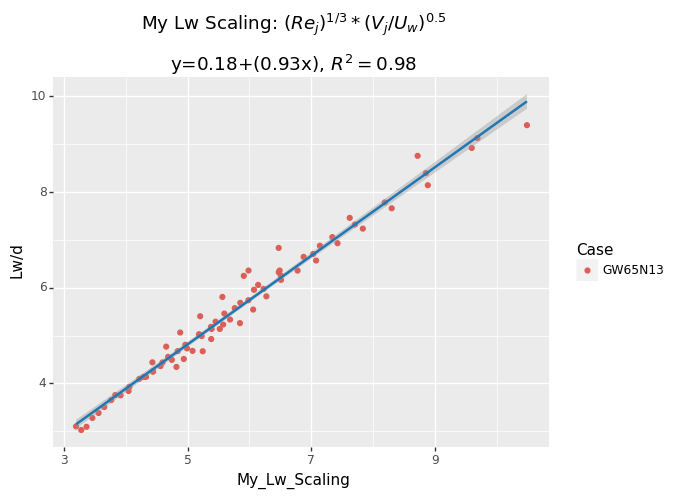

<ggplot: (-9223372036551525246)>

In [60]:
plot_Lw(GW65N13)

/Users/athena/Desktop/ML/handson-ml/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


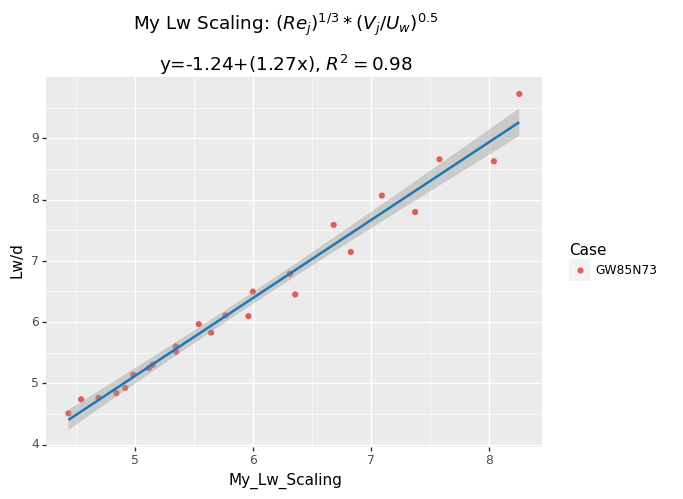

<ggplot: (-9223372036551792468)>

In [61]:
plot_Lw(GW85N73)

## Summary of Observations:
Comparing the slope of the regression lines.

### Combination 1:
- G85N41: Lh (0.27); Lw(0.88)
- G80N25: Lh (0.33); Lw(0.96)

### Combination 2:
- G85N73: Lh (0.38); Lw(1.27)
- G65N13: Lh (0.29); Lw(0.93)

### All Data:
- Lh (0.32); Lw(1.09)

Combination 1 overlaps generally well.

Combination 2 doesn't overlap well.